In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.cluster.vq import kmeans2, whiten

In [2]:
# read matrix X (without normalizing)
matX = np.load("Data/faceMatrix.npy").astype('float')

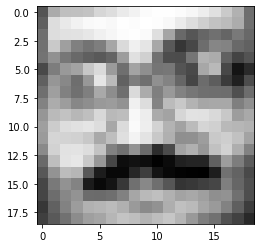

In [3]:
# have a look at the image
img = matX[:,0].reshape(19,19)
plt.imshow(img, cmap='gray')

In [4]:
# transpose the data matrix for the use of scipy kmeans
matX = np.transpose(matX)
# rescale eahc feature dimension
matX = whiten(matX)

In [6]:
def objectiveFunction(S):
    sum_dist = 0
    for xi in S:
        for xj in S:
            sum_dist += np.linalg.norm(xi-xj,2)
    return sum_dist

def findXClosestToCentroid(centroid, datapoints):
    min_dist = 1e+10
    for point in datapoints:
        distance = objectiveFunction([point, centroid])
        if distance < min_dist:
            x = point
            min_dist = distance
    return x

def findOptimalSet(k):    
    # run k-means and search for the data point (image) closest to the respective cluster center
    centroids, labels = kmeans2(matX, k, minit='++')
    optimal_set = []
    for centroid in centroids:
        x = findXClosestToCentroid(centroid, matX)
        optimal_set.append(x)
    return optimal_set, objectiveFunction(optimal_set)

25
49
100


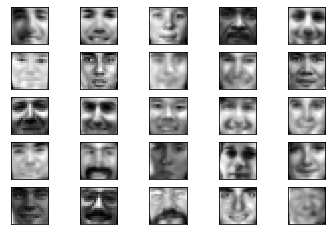

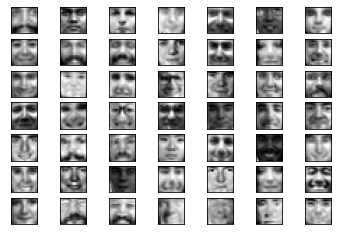

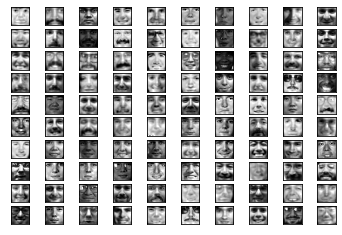

In [7]:
#list_k = range(10, 210, 20)
#list_k = [4, 9, 16]
list_k = [25, 49, 100] # 49 instead of 50 so the image result looks nicer

x = []
y = []

for k in list_k:
    x.append(k)
    optimal_set, obj_value = findOptimalSet(k)
    y.append(obj_value)
    print(k) # to monitor process
    # plot the result
    a = int(np.sqrt(k))
    fig, axes = plt.subplots(a, a)
    # remove the x and y ticks
    for i in range(a):
        for j in range(a):
            
            axes[i, j].imshow(optimal_set[i*a+j].reshape(19,19), cmap='gray')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

Text(0, 0.5, 'Value of the objective function')

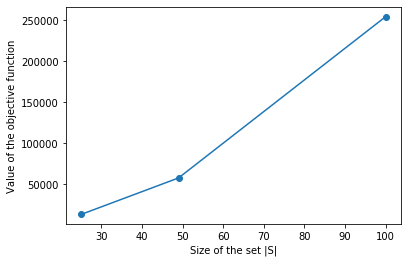

In [7]:
plt.plot(x, y, 'o-')
plt.xlabel('Size of the set |S|')
plt.ylabel('Value of the objective function')